# Sources
## Videos
1. ~~[Energy-based Approaches to Representation Learning - Yann LeCun](https://www.youtube.com/watch?v=m17B-cXcZFI)~~
2. [Week 7 – Lecture: Energy based models and self-supervised learning](https://www.youtube.com/watch?v=tVwV14YkbYs&feature=youtu.be)  
3. [Beyond temperature scaling: Obtaining well-calibrated multiclass probabilities with Dirichlet calibration](https://dirichletcal.github.io/documents/neurips2019/video/Meelis_Ettekanne.mp4) - **Bons slides!**  
4. [Brier Score and Practical Examples](https://www.youtube.com/watch?v=RXMu96RJj_s&t=1137s_)  
5. [Robust Artificial Intelligence: Obtaining Calibrated Probabilities from Machine Learning Models](https://www.youtube.com/watch?v=ujXgYXpedEk)  
6. [Isotonic Regression - University of Texas Austin](https://www.youtube.com/watch?v=TEbLUhHqLgE)
    
## Papers

### Calibration
1. **2005** - [Predicting Good Probabilities With Supervised Learning](https://www.cs.cornell.edu/~alexn/papers/calibration.icml05.crc.rev3.pdf)
2. **2017** - [A baseline for detecting misclassified and out-of-distribution examples in neural networks](https://arxiv.org/pdf/1610.02136.pdf)
3. **2017** - [On Calibration of Modern Neural Networks](https://geoffpleiss.com/nn_calibration)  
4. **2019** - [Why ReLU networks yield high-confidence predictions far away from
the training data and how to mitigate the problem](https://arxiv.org/abs/1812.05720)
5. **2019** - [Beyond temperature scaling: Obtaining well-calibrated multiclass probabilities with Dirichlet calibration](https://arxiv.org/pdf/1910.12656.pdf) [2](https://dirichletcal.github.io/)  
6. **2020** - [Being Bayesian, Even Just a Bit, Fixes Overconfidence in ReLU Networks](https://arxiv.org/pdf/2002.10118.pdf)
7. **2020** - [Calibrate and Prune: Improving Reliability of Lottery Tickets Through Prediction Calibration](https://arxiv.org/pdf/2002.03875v3.pdf)  
8. **2020** - [Unlabelled Data Improves Bayesian Uncertainty Calibration under Covariate Shift](https://arxiv.org/pdf/2006.14988.pdf)  
9. **2020** - [Mix-n-Match : Ensemble and Compositional Methods for Uncertainty Calibration in Deep Learning](https://arxiv.org/abs/2003.07329)  
10. **2020** - ICLR - [Distance-Based Learning from Errors for Confidence Calibration](https://iclr.cc/virtual_2020/poster_BJeB5hVtvB.html)  
11. **2020** - [Measuring Calibration in Deep Learning](https://openreview.net/pdf?id=r1la7krKPS)
12. **2021** - [Uncertainty calibration error: a new metric for multi-class classification](https://openreview.net/pdf?id=XOuAOv_-5Fx) 


### OOD
1. [Energy-based Out-of-distribution Detection](https://arxiv.org/abs/2010.03759)
2. [A Tutorial on Energy-Based Learning](http://yann.lecun.com/exdb/publis/pdf/lecun-06.pdf)  
3. [Beyond temperature scaling: Obtaining well-calibrated multiclass probabilities with Dirichlet calibration](https://dirichletcal.github.io/)  

### Paper - [Predicting Good Probabilities](https://www.cs.cornell.edu/~alexn/papers/calibration.icml05.crc.rev3.pdf)
- States that Correctly classified examples tend to have greater maximum softmax probabilities than erroneously classified and out-of-distribution examples, allowing for their detection
- **Softmax** - fast growing exponential function  
- Prediction probability from a softmax distribution has a poor direct correspondence to confidence.
- Defines standard tasks and evaluation metrics for OOD detection: 
    - **AUROC** (Area Under the Receiver Operating Characteristic curve) - sidesteps the issue of threshold selection
    - **AUPR** (Area Under the Precision-Recall curve)
- **Method 1**: uses maximum predicted class probabilities from softmax
    - Softmax prediction probability is a misleading confidence proxy when viewed in isolation.

### Video - [Thomas G. Dietterich - Calibration Video](https://www.youtube.com/watch?v=ujXgYXpedEk)  
- Why Calibrated Probabilities 
    - [SLIDE ✅](https://docs.google.com/presentation/d/1AOWvjUlaQzOmZU_9lpbL5XqGp3MMvhpCaC26ljsgFmY/edit#slide=id.ga4ff447423_0_10)
    - Rational Decision Making
    - Interpretability
    - System Integration (Sensor Fusing, evidence from multiple sources), ensembles
    - Improved Accuracy
- Multi-Class Problems [SLIDE ✅]
    - Normalized 1-vs-rest calibration
    - Softmax Temperature Scaling
    - Matrix Scaling (Generalized Platt Scaling)
    - Vector Scaling (Generalized Platt Scaling)

### Video - [Isotonic Regression - University of Texas Austin](https://www.youtube.com/watch?v=TEbLUhHqLgE)
- Piecewise Linear Manner
- Monotonic Constraint (no negative slope)
- Break the problem into small linear regression ones
- https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_IsotonicRegression.ipynb

Minimizes the following problem:

$$
minimize \; \sum_{i}w_{i}\;(y_{i}-\hat{y}_{i})^2
$$
Subject to monotonic constraint (always increasing):
$$
\hat{y}_{i} \leqslant \hat{y}_{j}
$$

With hyperparameter $k$ = number of bins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression

In [2]:
npoints = 70
x=np.arange(npoints)
slope = 10
mu, sigma = 2, 23
noise = np.random.normal(mu, sigma, npoints)
y = 3*x + noise

In [3]:
dataset = pd.DataFrame(data={"x":x, "y":y})
dataset.head()

,x,y
0,0,16.683669
1,1,-8.993944
2,2,-18.323330
3,3,-21.067972
4,4,38.922979


In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(dataset['x']), np.array(dataset['y']), test_size=0.25)

Text(0.5, 1.0, 'Number of Bins')

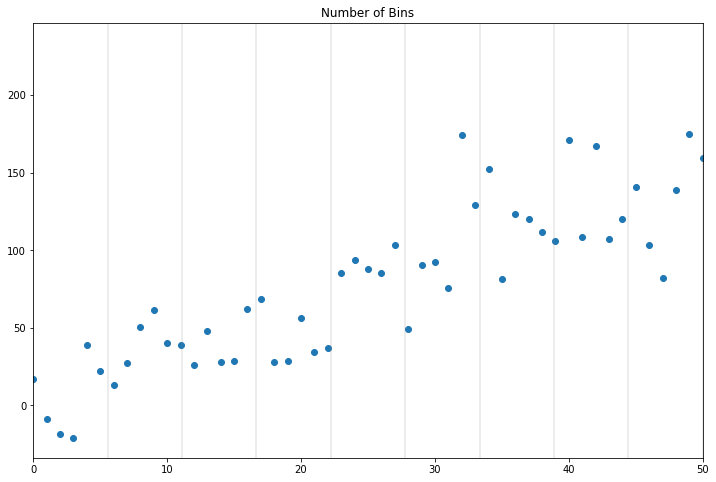

In [5]:
n_bins = 10
X_predict = np.linspace(0,50,n_bins)
plt.figure(figsize=(12,8))
for p in X_predict:
    plt.axvline(p, color = 'gray', alpha = 0.2)
plt.scatter(x,y)
plt.xlim(0,50)
plt.title("Number of Bins")

In [6]:
lin_model = LinearRegression()
lin_model.fit(xtrain.reshape(-1, 1),ytrain)

isotonic_model = IsotonicRegression()
isotonic_model.fit(xtrain,ytrain)

IsotonicRegression()

In [7]:
lin_preds = lin_model.predict(np.array(dataset['x']).reshape(-1, 1))

In [18]:
n_bins = 10
X_predict = np.linspace(0,50,n_bins)
isotonic_preds = isotonic_model.predict(X_predict)
X_predict, isotonic_preds

(array([ 0.        ,  5.55555556, 11.11111111, 16.66666667, 22.22222222,
        27.77777778, 33.33333333, 38.88888889, 44.44444444, 50.        ]),
 array([ -7.56921116,  29.43424094,  40.32843401,  46.27748346,
         67.7868774 ,  81.47467355, 129.42179084, 129.42179084,
        129.42179084, 154.52154788]))

Text(0.5, 1.0, 'Isotonic Regression')

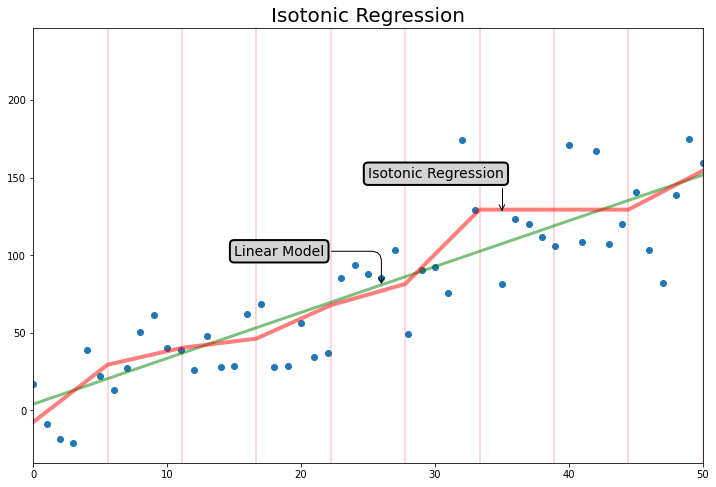

In [19]:
plt.figure(figsize=(12,8))
for p in X_predict:
    plt.axvline(p, color = 'red', alpha = 0.2)
plt.scatter(x,y)
plt.plot(x,lin_preds, color='green',alpha = 0.5,  linewidth=3, label='predicted test')
plt.plot(X_predict,isotonic_preds, color='red',alpha = 0.5,  linewidth=4, label='predicted test')
plt.xlim(0,50)

arrow = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")
bbox = dict(boxstyle="round", fc="lightgrey", lw=2)
plt.annotate("Linear Model",  xy=(26,80), xytext=(15,100),  size=14, bbox=bbox, arrowprops=arrow)
plt.annotate("Isotonic Regression",  xy=(35,127), xytext=(25,150),  size=14, bbox=bbox, arrowprops=arrow)

plt.title("Isotonic Regression", size=20)

In [11]:
plt.savefig("isotonic_regression.png")

<Figure size 432x288 with 0 Axes>

### Paper - [Baseline Misclassified](https://arxiv.org/pdf/1610.02136.pdf)

In [ ]:
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

offset = 72
ax.annotate(
    f'data = ({xdata:.1f}, {ydata:.1f})',
    (xdata, ydata),
    xytext=(-2*offset, offset), textcoords='offset points',
    bbox=bbox, arrowprops=arrowprops)

### Paper - [ReLU high-confidence](https://arxiv.org/pdf/1812.05720.pdf)
- ReLu - product almost always high confidence away from the data

### Review - [Video Yan Lecun](https://www.youtube.com/watch?v=m17B-cXcZFI&t=75s) 

- Reduce amount of supervision, obtain uncertainty info
- Not probabilistic view, no need to normalize
- Babies learn from observation, with little interaction
- Self-supervised learning $\rightarrow$ next revolution $\rightarrow$ use parts of the input to learn, without supervision **_"filling the blanks"_**
- Big question $\rightarrow$ how to do predictions in presence of uncertainty
- Energy-Based Unsupervised Learning
     - Learn an energy function F(Y) 
         - low values on data manifold (iid)
         - higher values everywhere else (OOD)
     - Unconditional F(y) and Conditional F(x,y)
     - Similar to Auto-encoders (Reconstruction error = Energy Function)
     - Most intersting strategy to shape energy function F(y), i.e., push OOD points up $\rightarrow$ **Regularized Latent Variable EBM**

### Review [EBM OOD Paper](https://arxiv.org/abs/2010.03759) 

### Review [A Tutorial on Energy-Based Learning](http://yann.lecun.com/exdb/publis/pdf/lecun-06.pdf) 

## Dataset - Census Income Dataset

## Slide: Calibration 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
size = 50
random_probas = pd.DataFrame(data=np.random.random(size), columns = ["Predicted Probas"])
random_probas.tail()

In [ ]:
random_probas['True outcome']=random_probas['Predicted Probas'].apply(lambda x: 1 if x-np.random.choice([0, np.random.random(1)])>0.5 else 0)
random_probas_sorted = random_probas.sort_values(by = 'Predicted Probas').reset_index(drop=True)
random_probas_sorted.tail()

In [ ]:
#!pip install arviz

In [ ]:
import arviz as az


In [ ]:
az.plot_kde(random_probas_sorted['Predicted Probas'])
az.set_ylim([-0.05, 1.05])

In [ ]:
s = pd.Series(random_probas_sorted['Predicted Probas'])
s.plot.kde()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
%matplotlib inline

In [ ]:
def plot_calibration_curve(df, num_bins=5):
    
    ## Normalize Probs
    df['Predicted Probas']=(df['Predicted Probas'] - df['Predicted Probas'].min()) / (df['Predicted Probas'].max() - df['Predicted Probas'].min())
    
    ## Getting DataFrame
    df['bins'] = pd.cut(df['Predicted Probas'], num_bins, labels=np.arange(num_bins))
    bined_plot = random_probas_sorted.groupby('bins').mean()

    ## Plot Calibration Curve
    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    ax1.plot(bined_plot['Predicted Probas'], bined_plot['True outcome'], "s-", label="Reliability Plot")
    ax2.hist(df['Predicted Probas'], range=(0, 1), bins=num_bins, histtype="step", lw=2)
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_calibration_curve(random_probas_sorted, num_bins=5)

## Brier Score